In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv, re
import nltk
import string
from html.parser import HTMLParser
import pickle
import logging
import warnings
import gensim

from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import TruncatedSVD, NMF, PCA

%matplotlib inline

In [379]:
df = pd.read_pickle('more_tweet_data.pkl')

In [380]:
# nltk.download('wordnet')
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# nltk.download('punkt')
# nltk.download("gutenberg")

### Count Vectorizer

In [381]:
cv = CountVectorizer(stop_words='english')

In [382]:
X = cv.fit_transform(df.stemmed)
count_vecs = pd.DataFrame(X.toarray(), index=df.stemmed, columns=cv.get_feature_names())

In [383]:
count_vecs.shape

(3558, 5870)

In [384]:
count_vecs.head()

,aaa,aaron,abbys,aber,aberdeen,abhijit,ability,abla,able,aboard,...,yuuuhh,zandu,zephaniah,zero,zeth,zika,zilch,zombie,zone,zoolander
stemmed,,,,,,,,,,,,,,,,,,,,,
fuck heck fridge knock landlord door ##,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
indian uber driver word wasnt vehicle jump,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ask parcel deliver pick store address,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
whichever butt wipe pull alarm davis sound asleep ######,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
join phone talk rude money acc willynilly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorizer

In [385]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    max_features=10000)

X = word_vectorizer.fit_transform(df.stemmed)

# char_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     strip_accents='unicode',
#     analyzer='char',
#     ngram_range=(1, 6),
#     max_features=30000)
# char_vectorizer.fit(df.stemmed)

In [386]:
# wordvec = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

In [387]:
# word_vectorizer.get_feature_names()

In [388]:
tfidf_vecs = pd.DataFrame(X.toarray(), index=df.stemmed, columns=word_vectorizer.get_feature_names())

In [389]:
tfidf_vecs.head()

,aaa,aaron,abbys,aber,aberdeen,abhijit,ability,abla,able,aboard,...,yuuuhh,zandu,zephaniah,zero,zeth,zika,zilch,zombie,zone,zoolander
stemmed,,,,,,,,,,,,,,,,,,,,,
fuck heck fridge knock landlord door ##,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
indian uber driver word wasnt vehicle jump,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ask parcel deliver pick store address,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
whichever butt wipe pull alarm davis sound asleep ######,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
join phone talk rude money acc willynilly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### LSA on Count Vectorizer

In [390]:
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(count_vecs)
lsa.explained_variance_ratio_

array([0.00524747, 0.00657153, 0.00631275, 0.00579253])

In [391]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3", "component_4"],
             columns = cv.get_feature_names())
topic_word

,aaa,aaron,abbys,aber,aberdeen,abhijit,ability,abla,able,aboard,...,yuuuhh,zandu,zephaniah,zero,zeth,zika,zilch,zombie,zone,zoolander
component_1,0.0,0.0,0.001,0.0,0.0,0.0,0.004,0.001,0.002,0.0,...,0.0,0.0,0.001,0.003,0.001,0.0,0.002,0.0,0.002,0.001
component_2,-0.0,-0.0,-0.000,-0.0,-0.0,-0.0,0.000,-0.001,-0.000,-0.0,...,0.0,-0.0,-0.000,-0.001,-0.000,-0.0,0.000,-0.0,-0.001,0.001
component_3,0.0,0.0,-0.000,-0.0,0.0,-0.0,-0.001,0.000,-0.001,-0.0,...,-0.0,-0.0,-0.002,-0.001,-0.000,-0.0,0.000,0.0,-0.000,-0.001
component_4,-0.0,-0.0,-0.001,-0.0,0.0,-0.0,-0.001,-0.001,0.000,-0.0,...,-0.0,0.0,-0.002,-0.002,0.000,0.0,-0.000,-0.0,-0.000,-0.002


In [392]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [393]:
display_topics(lsa, cv.get_feature_names(), 15)


Topic  0
people, feel, good, love, need, look, right, start, happy, fuck, bad, life, watch, new, leave

Topic  1
feel, bad, look, right, play, watch, home, accept, challenge, night, exhilaration, future, little, victory, sleep

Topic  2
love, good, happy, run, smile, birthday, teach, sad, despair, optimism, new, cheerful, theres, tiff, awesome

Topic  3
good, happy, look, morning, world, great, thing, weary, cheerful, better, end, grow, horror, offer, start


### LSA on TF-IDF 

In [394]:
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(tfidf_vecs)
lsa.explained_variance_ratio_

array([0.00301846, 0.00404481, 0.0038491 , 0.00334345])

In [395]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4"],
             columns = word_vectorizer.get_feature_names())
topic_word

,aaa,aaron,abbys,aber,aberdeen,abhijit,ability,abla,able,aboard,...,yuuuhh,zandu,zephaniah,zero,zeth,zika,zilch,zombie,zone,zoolander
component_1,0.0,0.001,0.001,0.0,0.0,0.0,0.008,0.001,0.003,0.0,...,0.0,0.0,0.001,0.005,0.001,0.0,0.001,0.000,0.001,0.005
component_2,-0.0,-0.000,-0.001,-0.0,-0.0,-0.0,-0.005,-0.000,-0.002,-0.0,...,-0.0,-0.0,-0.001,-0.004,-0.000,-0.0,0.000,-0.000,-0.001,-0.002
component_3,-0.0,-0.000,0.000,0.0,0.0,-0.0,0.003,0.000,-0.002,0.0,...,-0.0,0.0,-0.002,-0.001,-0.000,0.0,-0.000,-0.000,-0.000,-0.013
component_4,-0.0,-0.002,-0.001,-0.0,-0.0,-0.0,-0.001,-0.001,-0.005,-0.0,...,-0.0,-0.0,-0.001,-0.014,-0.001,-0.0,-0.001,-0.001,-0.001,-0.012


In [396]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [397]:
display_topics(lsa, word_vectorizer.get_feature_names(), 10)


Topic  0
love, good, feel, happy, people, look, right, start, need, thank

Topic  1
love, smile, thank, movien, new, optimism, teach, katie, sadly, honesty

Topic  2
good, happy, morning, weary, thank, grow, saturday, birthday, awesome, fall

Topic  3
feel, love, happy, good, exhilaration, accept, victory, drown, worthless, challenge


In [398]:
H = pd.DataFrame(doc_topic.round(5),
             columns = ["component_1","component_2","component_3","component_4"])

In [399]:
H.head()

,component_1,component_2,component_3,component_4
0,0.03331,-0.01821,0.00100,-0.03472
1,0.02392,-0.00090,-0.00290,-0.00950
2,0.02180,-0.01566,-0.00999,-0.01574
3,0.01234,-0.00660,0.00780,-0.00657
4,0.03338,-0.00209,-0.00935,-0.03625


### NMF on Count Vectorizer

In [569]:
nmf_model = NMF(6)
doc_topic = nmf_model.fit_transform(count_vecs)

In [571]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3", "component_4", "component_5", "component_6"],
             columns = cv.get_feature_names())
topic_word

,aaa,aaron,abbys,aber,aberdeen,abhijit,ability,abla,able,aboard,...,yuuuhh,zandu,zephaniah,zero,zeth,zika,zilch,zombie,zone,zoolander
component_1,0.000,0.000,0.000,0.001,0.0,0.001,0.000,0.001,0.000,0.002,...,0.000,0.001,0.000,0.003,0.002,0.001,0.000,0.0,0.000,0.000
component_2,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
component_3,0.000,0.001,0.000,0.000,0.0,0.000,0.001,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.0,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.0,0.000,0.003,0.002,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.002,0.000
component_5,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
component_6,0.001,0.002,0.007,0.002,0.0,0.001,0.020,0.005,0.018,0.000,...,0.001,0.000,0.014,0.014,0.001,0.000,0.010,0.0,0.008,0.017


In [572]:
display_topics(nmf_model, cv.get_feature_names(), 15)


Topic  0
people, black, irritate, offend, country, fuck, life, straight, talk, guy, leave, hungry, white, unhappy, ill

Topic  1
feel, right, look, home, challenge, accept, exhilaration, future, little, night, victory, worst, leave, hear, believe

Topic  2
love, happy, run, smile, fear, new, theres, lot, teach, birthday, sad, despair, laugh, thank, hate

Topic  3
good, happy, start, look, morning, great, world, cheerful, life, thing, end, weary, maybe, man, horror

Topic  4
bad, play, look, coach, ball, horrible, texans, performance, protection, defense, overall, man, black, game, team

Topic  5
need, watch, fuck, start, come, new, thank, wait, use, stop, right, dreadful, lose, guy, long


- Preidct using NMF on my new data
- it will give you vector of 10 values
- highest value will be associated emotion

### NMF on TF-IDF

In [557]:
nmf_model = NMF(6)
doc_topic = nmf_model.fit_transform(tfidf_vecs)

In [558]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6"],
             columns = word_vectorizer.get_feature_names())
topic_word

,aaa,aaron,abbys,aber,aberdeen,abhijit,ability,abla,able,aboard,...,yuuuhh,zandu,zephaniah,zero,zeth,zika,zilch,zombie,zone,zoolander
component_1,0.001,0.006,0.007,0.002,0.0,0.001,0.028,0.005,0.021,0.000,...,0.002,0.0,0.008,0.030,0.004,0.001,0.007,0.003,0.01,0.054
component_2,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
component_3,0.000,0.000,0.000,0.000,0.0,0.000,0.013,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
component_4,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.001,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
component_5,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.002,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
component_6,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.001,...,0.000,0.0,0.000,0.003,0.001,0.000,0.000,0.000,0.00,0.000


In [559]:
display_topics(nmf_model, word_vectorizer.get_feature_names(), 10)


Topic  0
start, need, watch, leave, fuck, play, right, new, pout, thank

Topic  1
love, smile, new, movien, optimism, talk, happy, thank, teach, song

Topic  2
good, happy, morning, saturday, weary, birthday, grow, awesome, worry, fall

Topic  3
feel, right, night, exhilaration, accept, challenge, victory, future, drown, worthless

Topic  4
look, color, bright, forward, bring, heyday, old, girls, tweet, rabid

Topic  5
people, offend, irritate, black, fuck, unhappy, happen, angry, country, straight


### LDA on Count Vectorized

In [407]:
# create the term-doc matrix, transpose so that terms are rows

doc_word = cv.transform(count_vecs).transpose()

In [408]:
pd.DataFrame(doc_word.toarray(), cv.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,...,5860,5861,5862,5863,5864,5865,5866,5867,5868,5869
aaa,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbys,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aber,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aberdeen,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [409]:
doc_word.shape

(5870, 5870)

In [410]:
# converts sparse matrix of counts to a gensim corpus 
corpus = matutils.Sparse2Corpus(doc_word)

NameError: name 'matutils' is not defined

In [411]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [412]:
len(id2word)

5870

In [413]:
# 'fitting' the model
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)

NameError: name 'models' is not defined

In [414]:
lda.print_topics()

NameError: name 'lda' is not defined

### Tokenization on best model
 - TF-IDF, NFM

In [415]:
# word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     strip_accents='unicode',
#     analyzer='word',
#     token_pattern=r'\w{1,}',
#     ngram_range=(1, 2),
#     max_features=10000)

# X_bi = word_vectorizer.fit_transform(df.shorthand)

In [416]:
# tfidf_bi_vecs = pd.DataFrame(X_bi.toarray(), index=df.shorthand, columns=word_vectorizer.get_feature_names())

In [417]:
# nmf_bi_model = NMF(4)

In [418]:
# bi_doc_topic = nmf_model.fit_transform(tfidf_bi_vecs)

In [419]:
# bi_topic_word = pd.DataFrame(nmf_bi_model.components_.round(3),
#              index = ["component_1","component_2","component_3", "component_4"],
#              columns = word_vectorizer.get_feature_names())
# bi_topic_word

In [420]:
# word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     strip_accents='unicode',
#     analyzer='word',
#     token_pattern=r'\w{1,}',
#     ngram_range=(1, 3),
#     max_features=10000)

# X_tri = word_vectorizer.fit_transform(df.shorthand)

In [421]:
# tfidf_tri_vecs = pd.DataFrame(X_tri.toarray(), index=df.shorthand, columns=word_vectorizer.get_feature_names())

In [422]:
# nmf_tri_model = NMF(4)

In [423]:
# tri_doc_topic = nmf_model.fit_transform(tfidf_tri_vecs)

In [424]:
# bi_topic_word = pd.DataFrame(nmf_tri_model.components_.round(3),
#              index = ["component_1","component_2","component_3", "component_4"],
#              columns = word_vectorizer.get_feature_names())
# bi_topic_word

### Word2Vec

In [425]:
# vectorizer = CountVectorizer(ngram_range=(1,2))

In [426]:
# vectorizer.fit(df.stemmed)
# x = vectorizer.transform(df.stemmed)
# x_back = x.toarray()

# pd.DataFrame(x_back, columns=vectorizer.get_feature_names())

In [427]:
# documents = df.stemmed
# texts = [[word for word in document.lower().split()]
#          for document in documents]


# print (texts)
# model = gensim.models.Word2Vec(texts, size=100, window=2, min_count=1, workers=4,sg=1)

In [428]:
# additional_stop_words = ['dont','get','did','know','really','tell','work','tonight','going','like','want','go','gbbo','make','day','say','do','let','think','just']
# stoplist = text.ENGLISH_STOP_WORDS.union(additional_stop_words)


# texts = [[word for word in document.lower().split() if word not in stoplist]
#          for document in documents]

In [429]:
# model = gensim.models.Word2Vec(texts, size=100, window=5, 
#                                min_count=1, workers=2, sg=1)

In [430]:
list(model.wv.vocab.items())[:7]

[('fuck', <gensim.models.keyedvectors.Vocab at 0x1a22de0a20>),
 ('heck', <gensim.models.keyedvectors.Vocab at 0x1a4108d2e8>),
 ('fridge', <gensim.models.keyedvectors.Vocab at 0x1a3dd75978>),
 ('knock', <gensim.models.keyedvectors.Vocab at 0x1a3dd75908>),
 ('landlord', <gensim.models.keyedvectors.Vocab at 0x1a3dd75400>),
 ('door', <gensim.models.keyedvectors.Vocab at 0x1a3dd757f0>),
 ('##', <gensim.models.keyedvectors.Vocab at 0x1a3dd75438>)]

In [431]:
# from sklearn.metrics.pairwise import cosine_similarity

In [432]:

# model.similarity('laughter', 'fuck')

In [433]:
# model.most_similar('laughter' ,topn=10)

In [434]:
# model.similarity('love','terrorism')

In [435]:
# model.n_similarity(['happy', 'smile'], ['sad', 'ugh'])

### PCA

In [577]:
pca = PCA(n_components=10) 
pca.fit(tfidf_vecs)
pcafeatures_train = pca.transform(tfidf_vecs)

In [578]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(5,5))
    for i, c, label in zip(target_ids, colors, target_names):
        ax = plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    
    plt.legend()



# other colours: ,'m','y','orange','w','aqua','yellow'

In [579]:
pca.explained_variance_ratio_

array([0.0045217 , 0.00410436, 0.00391099, 0.00354123, 0.00319513,
       0.00297676, 0.00293979, 0.00284585, 0.00278521, 0.00276173])

Plot graph to see elbow of how many components to include

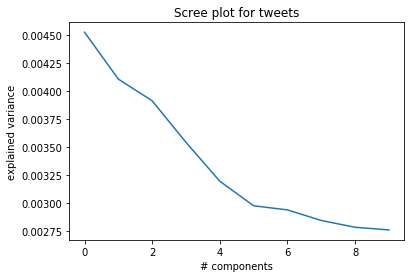

In [580]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for tweets');

In [563]:
pd.DataFrame(pcafeatures_train)

,0,1,2,3,4,5
0,-0.006110,-0.011442,-0.001600,-0.004924,-0.007402,0.002694
1,-0.007429,-0.003480,-0.005428,-0.006925,-0.005507,-0.008934
2,-0.001717,-0.009443,-0.007772,-0.004771,-0.007671,-0.004834
3,-0.004810,-0.007666,-0.009769,0.001743,-0.007649,-0.012429
4,-0.008539,-0.007142,0.006661,-0.006638,-0.005581,-0.002674
5,0.005835,-0.006114,-0.008548,-0.002634,-0.007828,-0.007650
6,-0.005499,-0.012013,-0.011326,-0.005486,-0.010094,0.028110
7,-0.005442,-0.008144,-0.009214,-0.005168,-0.007383,-0.007433
8,-0.027295,-0.027692,0.183275,-0.009311,0.013017,0.006949
9,-0.000653,-0.005313,-0.003654,-0.006990,-0.005762,0.010064


In [565]:
target_names = [0, 1, 2, 3, 4, 5]

In [566]:
df.emotion.unique()

array([1, 2, 3, 4])

In [567]:
# df.emotion = df.emotion.replace({'anger':1, 'fear':2, 'joy':3, 'sadness':4})

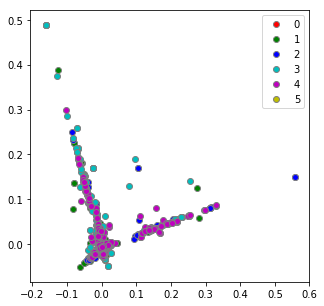

In [568]:
plot_PCA_2D(pcafeatures_train, target=df.emotion, target_names=target_names)